<a href="https://colab.research.google.com/github/Divyarka/Case-studies/blob/main/NYC_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')


In [ ]:
taxi = pd.read_csv("/content/drive/MyDrive/nyc_taxi_trip_duration.csv")
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


#Variable Identification

In [ ]:
taxi.shape

(729322, 11)

In [ ]:
taxi.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
taxi['vendor_id'] = taxi['vendor_id'].astype('category')
taxi['id'] = taxi['id'].astype('string')
taxi['store_and_fwd_flag'] = taxi['store_and_fwd_flag'].astype('category')
taxi['trip_duration'] = taxi['trip_duration'].astype('float64')
taxi.dtypes

id                      string
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration          float64
dtype: object

In [ ]:
pickup = pd.DatetimeIndex(taxi['pickup_datetime'])
dropoff = pd.DatetimeIndex(taxi['dropoff_datetime'])

taxi['pickup_day'] = pickup.dayofweek
taxi['pickup_month'] = pickup.month
taxi['pickup_doyear'] = pickup.dayofyear
taxi['pickup_hour'] = pickup.hour


taxi['dropoff_day'] = dropoff.dayofweek
taxi['dropoff_month'] = dropoff.month
taxi['dropoff_doyear'] = dropoff.dayofyear
taxi['dropoff_hour'] = dropoff.hour

#converting datetime columns into category:
taxi['pickup_day'] = taxi['pickup_day'].astype('category')
taxi['pickup_month'] = taxi['pickup_month'].astype('category')
taxi['dropoff_day'] = taxi['dropoff_day'].astype('category')
taxi['dropoff_month'] = taxi['dropoff_month'].astype('category')



taxi.drop(columns=['pickup_datetime', 'dropoff_datetime'], inplace=True)

#Univariate Analysis

> ## Numerical Univariate



In [ ]:
# Perceiving every variable:

taxi.dtypes


id                      string
vendor_id             category
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration          float64
pickup_day            category
pickup_month          category
pickup_doyear            int64
pickup_hour              int64
dropoff_day           category
dropoff_month         category
dropoff_doyear           int64
dropoff_hour             int64
dtype: object

In [ ]:
def UVA_numeric(data, var):

  plt.figure(figsize=(6,3), dpi=100)

  mini = data[var].min()
  maxi = data[var].max()
  range = maxi - mini
  mean = data[var].mean()
  median = data[var].median()
  stddev = data[var].std()
  skew = data[var].skew()
  kurt = data[var].kurtosis()

  points = [mean-stddev, mean+stddev]

  sns.kdeplot(data[var], shade=True)
  sns.lineplot(points, [0,0], color='yellow', label='std_dev')
  sns.scatterplot([mini, maxi], [0,0], color='orange', label='min/max')
  sns.scatterplot([mean], [0], color='red', label='mean')
  sns.scatterplot([median], [0], color='blue', label='median')
  plt.xlabel('{}'.format(var), fontsize=20)
  plt.ylabel('density')

  print('skewness: ', skew)
  print('kurtosis: ', kurt)
  print('mean: ', mean)
  print('median: ', median)
  print('range: ', range)




skewness:  2.135237482375149
kurtosis:  3.464417258605018
mean:  1.6620546205928246
median:  1.0
range:  9


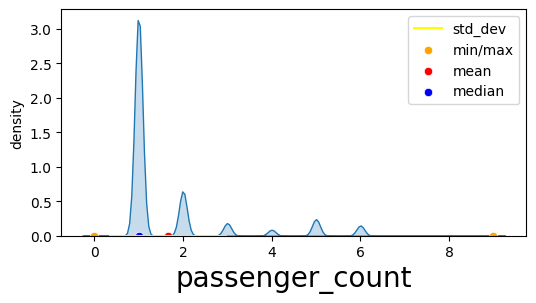

In [ ]:
UVA_numeric(taxi, 'passenger_count')

Passenger_count:

Has a right skewed distribution i.e. biased towards small count of passengers. Large number of outliers/ extremes

Mode = 1

Almost 50% of rides have taken 1 passenger

Majority of rides have carried 1-3 passengers.

skewness:  -444.21971006580213
kurtosis:  306781.5324745007
mean:  -73.97351307454848
median:  -73.98175811767578
range:  56.035957336425795


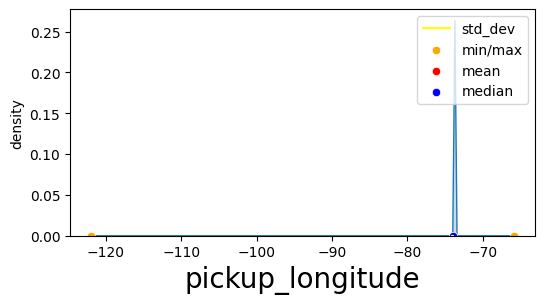

In [ ]:
UVA_numeric(taxi, 'pickup_longitude')


*  Majority of pickups from around -73 deg
*  left skewed, huge number of outliers


skewness:  35.36948985489284
kurtosis:  19348.414225763372
mean:  40.75091887972495
median:  40.754070281982415
range:  17.168849945068352


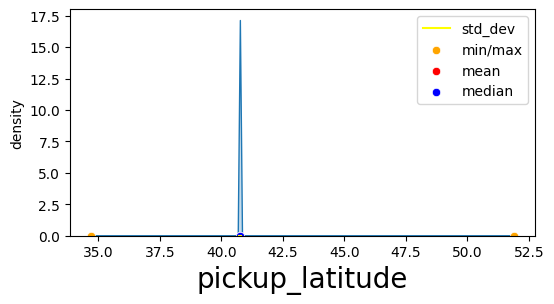

In [ ]:
UVA_numeric(taxi, 'pickup_latitude')



*   Majority of rides hired from 40.75 deg latitude
*   right skewed, huge number of outliers



skewness:  -449.89046680280745
kurtosis:  309924.35868695506
mean:  -73.97342219209891
median:  -73.9797592163086
range:  56.03591918945311


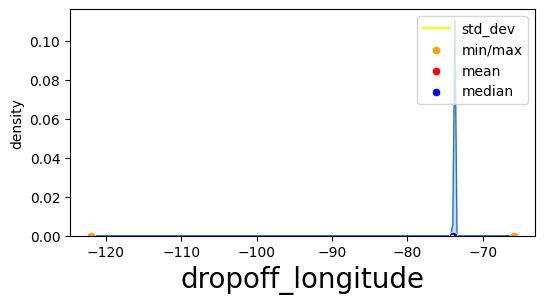

In [ ]:
UVA_numeric(taxi, 'dropoff_longitude')



*   Majority of rides culminated at around -74 deg longitude which is nearly the same as pickup location
*   Left skewed, huge number of outliers



skewness:  -23.503536072832617
kurtosis:  5639.244571079744
mean:  40.751775436975464
median:  40.75450897216797
range:  11.739887237548828


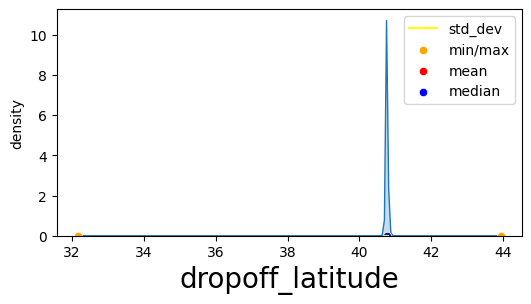

In [ ]:
UVA_numeric(taxi, 'dropoff_latitude')



*   Majority of rides culminate at 40.75 deg latitude which is the same as pickup latitude



skewness:  186.6784368781186
kurtosis:  87142.4634003971
mean:  952.2291333594764
median:  663.0
range:  1939735.0


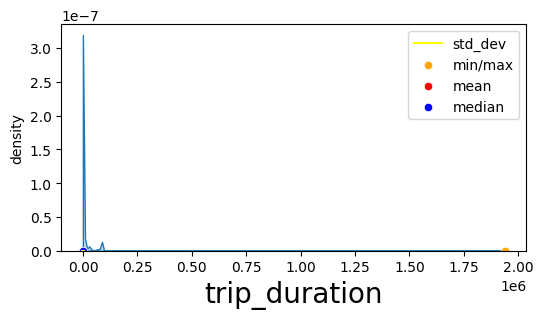

In [ ]:
UVA_numeric(taxi, 'trip_duration')



*   Large number of outliers.
*   Right skewed, entirely biased towards very small duration < 2000 sec i.e. 33 min
*   Average ride length is around 16 min
*   Around 50% of rides are less than 11 min.





skewness:  -0.04251151619248587
kurtosis:  -1.2024439005826386
mean:  3.0490812014446296
median:  3.0
range:  6


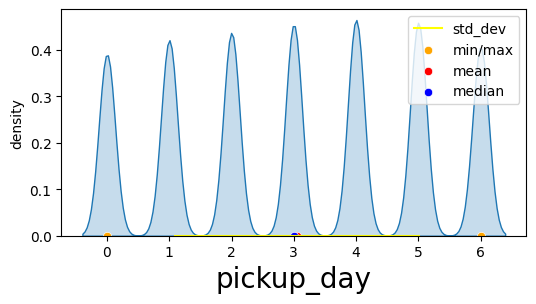

In [ ]:
UVA_numeric(taxi, 'pickup_day')



*   Zero stands for Monday and Six stands for sunday
*   Friday shows highest no of rides, followed by saturday.
*   Sunday shows least no of rides.
*   Curve slighlty skewed towards weekend.









skewness:  -0.4455742773750432
kurtosis:  -0.7222717020630545
mean:  13.611698262221624
median:  14.0
range:  23


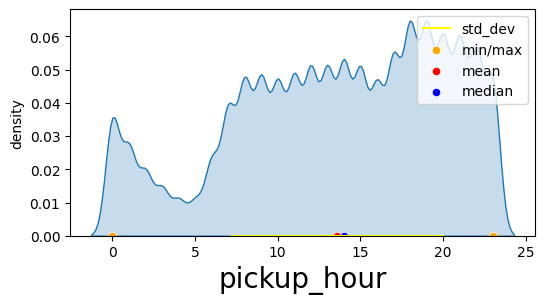

In [ ]:
UVA_numeric(taxi, 'pickup_hour')



*   Cab bookings are at their peak in between 6pm to 8pm
*   At their lowest in between 4pm to 5pm
*   Quite a high number of bookings even at midnight
*   Sudden rise in bookings after 6 am.





skewness:  -0.4637696839806057
kurtosis:  -0.7263079701301018
mean:  13.606160241978166
median:  14.0
range:  23


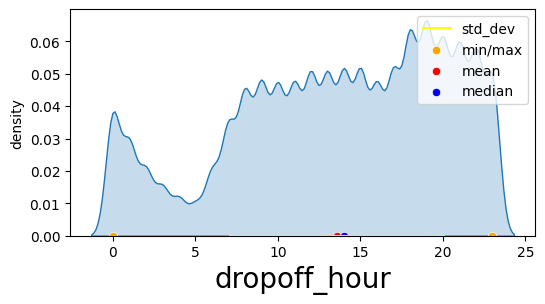

In [ ]:
UVA_numeric(taxi,'dropoff_hour')

Maximum dropoffs occur in between 6pm to 7pm.

skewness:  -0.0014761522526147396
kurtosis:  -1.15920579930899
mean:  91.88257724297361
median:  92.0
range:  181


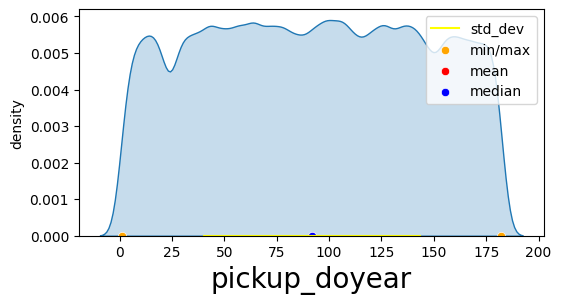

In [ ]:
UVA_numeric(taxi, 'pickup_doyear')



1. Nearly uniform distribution throughout the half-year period.
2. Slight decrease in demand near 20th-25th Jan.



> ## Categorical Univariate




In [ ]:
taxi.select_dtypes(include='category').dtypes

vendor_id             category
store_and_fwd_flag    category
pickup_day            category
pickup_month          category
dropoff_day           category
dropoff_month         category
dtype: object

In [ ]:
def UVA_category(data, var):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  #size = len(var)
  plt.figure(figsize = (7,2), dpi = 100)

  # for every variable
  norm_count = data[var].value_counts(normalize = True)
  n_uni = data[var].nunique()

  #Plotting the variable with every information
  #plt.subplot(1,size,j+1)
  sns.barplot(norm_count, norm_count.index , order = norm_count.index)
  plt.xlabel('fraction/percent', fontsize = 20)
  plt.ylabel('{}'.format(var), fontsize = 20)
  plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

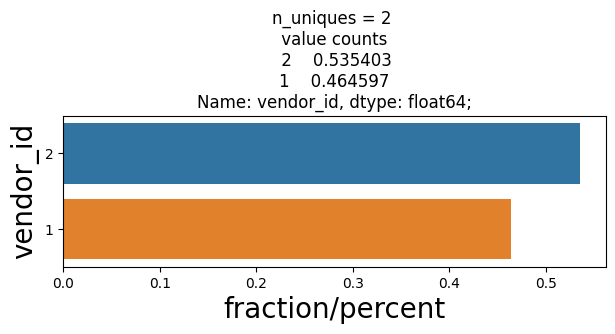

In [ ]:
UVA_category(taxi, 'vendor_id')



*   Vendor 2 has provided services more often than vendor 1. Not much difference however.




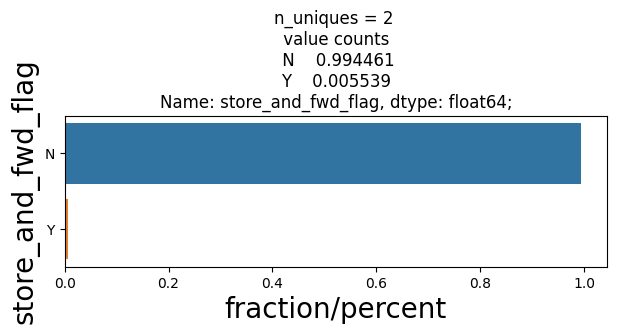

In [ ]:
UVA_category(taxi, 'store_and_fwd_flag')

This flag has been used only in 0.5% of cases, i.e. occurence of network loss and consequent misrepresentation of data, has happened extremely rarely.

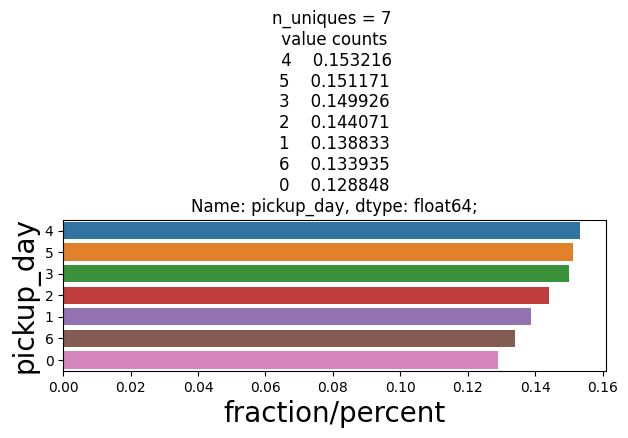

In [ ]:
UVA_category(taxi, 'pickup_day')



*   Max no of rides hired on Fridays, followed by Saturdays.
*   Min no of rides booked on Mondays.**??**



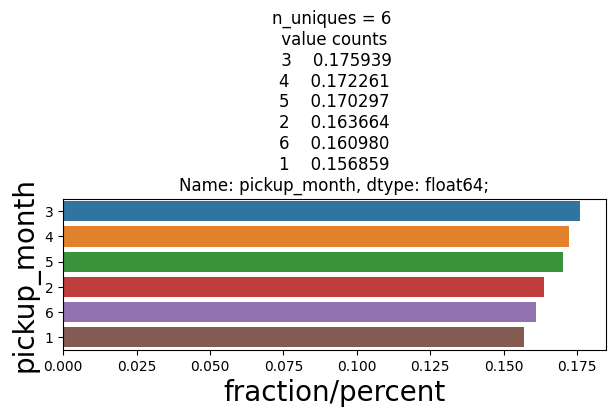

In [ ]:
UVA_category(taxi, 'pickup_month')



*  Highest no of bookings in March, followed by April.
*  Lowest no of Bookings in January (explained by the dry spell in Jan 2nd half)



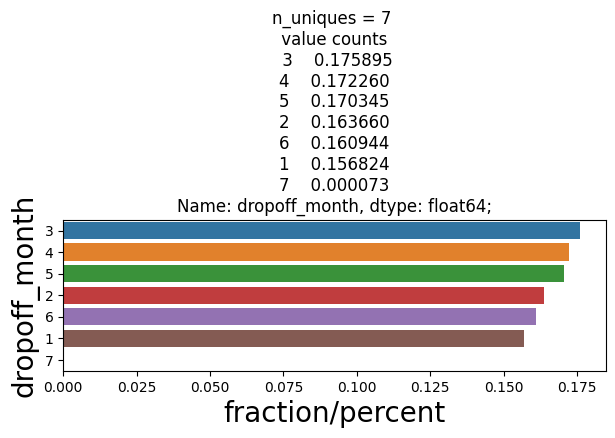

In [ ]:
UVA_category(taxi, 'dropoff_month')

Some rides have ended on 1st July 2016, and have been reflected here.



> ## Missing Values: Univariate



In [ ]:
taxi.isnull().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_day            0
pickup_month          0
pickup_doyear         0
pickup_hour           0
dropoff_day           0
dropoff_month         0
dropoff_doyear        0
dropoff_hour          0
dtype: int64

There are no missing values in this data.


> ## Outlier Detection




Outliers were suspected in Pickup and Dropoff Longitude, latitude

Trip duration

and Passenger count

In [ ]:
def UVA_outliers(data, var):

  plt.figure(figsize=(7,2), dpi=100)

  med = data[var].median()
  Q1 = data[var].quantile(0.25)
  Q3 = data[var].quantile(0.75)
  IQR = Q3-Q1
  whis_low = Q1-(1.5*IQR)
  whis_high = Q3+(1.5*IQR)


  #data2 = data
  #data2[var][data2[var] > whis_high] = whis_high+1
  #data2[var][data2[var] < whis_low] = whis_low-1


  outlier_high = len(data[var][data[var] > whis_high])
  outlier_low = len(data[var][data[var] < whis_low])

  sns.boxplot(data[var], orient="v")
  plt.ylabel('{}'.format(var))
  plt.title('IQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(Q1,2),round(Q3,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

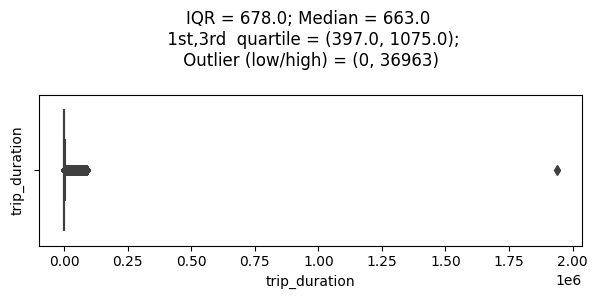

In [ ]:
UVA_outliers(taxi, 'trip_duration')

Only one absurd value of nearly 2 million sec i.e. 555 hrs, which must be erroneous reporting,
Has to be dropped or replaced.

Nearly 1100 entries are greater than 2hrs duration, which is abnormal. Has to be investigated.

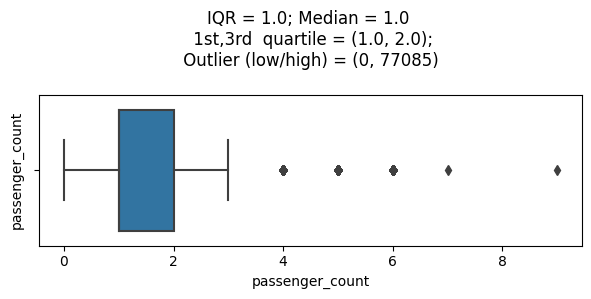

In [ ]:
UVA_outliers(taxi, 'passenger_count')



* Although there appear to be many outliers, but most of them are genuine cases considering the availability of 6 seater SUVs.  
*   However the cases of 9 passengers, appears to be abnormal and has to be investigated.



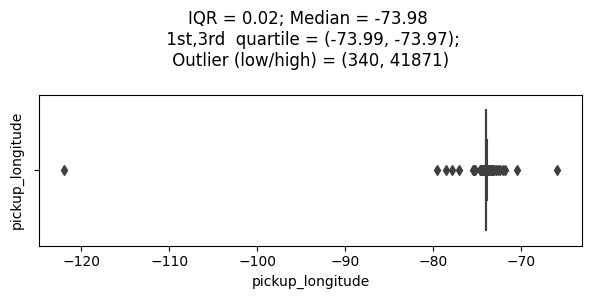

In [ ]:
UVA_outliers(taxi, 'pickup_longitude')

Huge number of outliers which lie between -80 to -65, which could be genuine, if whole of NY state is considered.


But -125 deg is definitely erroneous, as it lies west of LA.

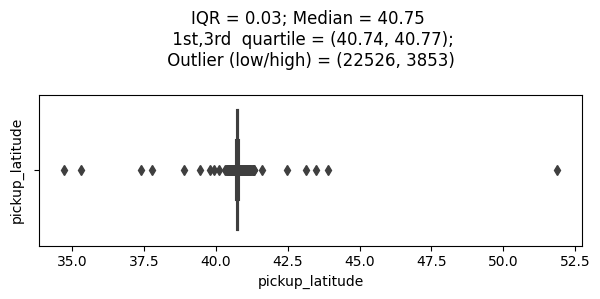

In [ ]:
UVA_outliers(taxi, 'pickup_latitude')

Huge number of outliers beyond the territory of NY state ie 40 to 42 deg.

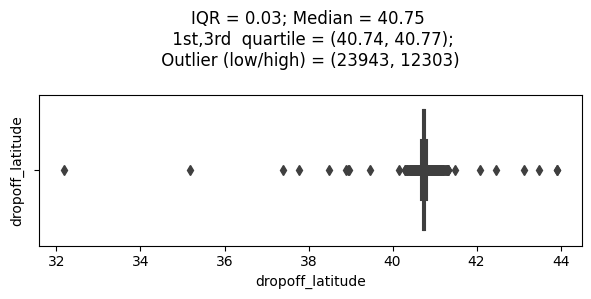

In [ ]:
UVA_outliers(taxi, 'dropoff_latitude')

# Bivariate Analysis



> ## Numerical-Numerical



In [ ]:
taxi.dtypes

id                      string
vendor_id             category
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration          float64
pickup_day            category
pickup_month          category
pickup_doyear            int64
pickup_hour              int64
dropoff_day           category
dropoff_month         category
dropoff_doyear           int64
dropoff_hour             int64
dtype: object

In [ ]:
numericals = taxi.select_dtypes(include = ['int64', 'float64'])
numericals.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration        float64
pickup_doyear          int64
pickup_hour            int64
dropoff_doyear         int64
dropoff_hour           int64
dtype: object

In [ ]:
correlation = numericals.dropna().corr()
correlation

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_doyear,pickup_hour,dropoff_doyear,dropoff_hour
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,-0.001182,0.009851,-0.001168,0.009214
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.003737,0.010754,0.003764,0.011170
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.001244,0.011433,-0.001313,0.018061
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.003762,-0.022014,0.003787,-0.023193
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.001627,0.014257,-0.001673,0.018173
trip_duration,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.009418,0.002979,0.010285,0.003027
pickup_doyear,-0.001182,0.003737,-0.001244,0.003762,-0.001627,0.009418,1.000000,-0.003549,0.999998,-0.004270
pickup_hour,0.009851,0.010754,0.011433,-0.022014,0.014257,0.002979,-0.003549,1.000000,-0.003272,0.934591
dropoff_doyear,-0.001168,0.003764,-0.001313,0.003787,-0.001673,0.010285,0.999998,-0.003272,1.000000,-0.004675
dropoff_hour,0.009214,0.011170,0.018061,-0.023193,0.018173,0.003027,-0.004270,0.934591,-0.004675,1.000000


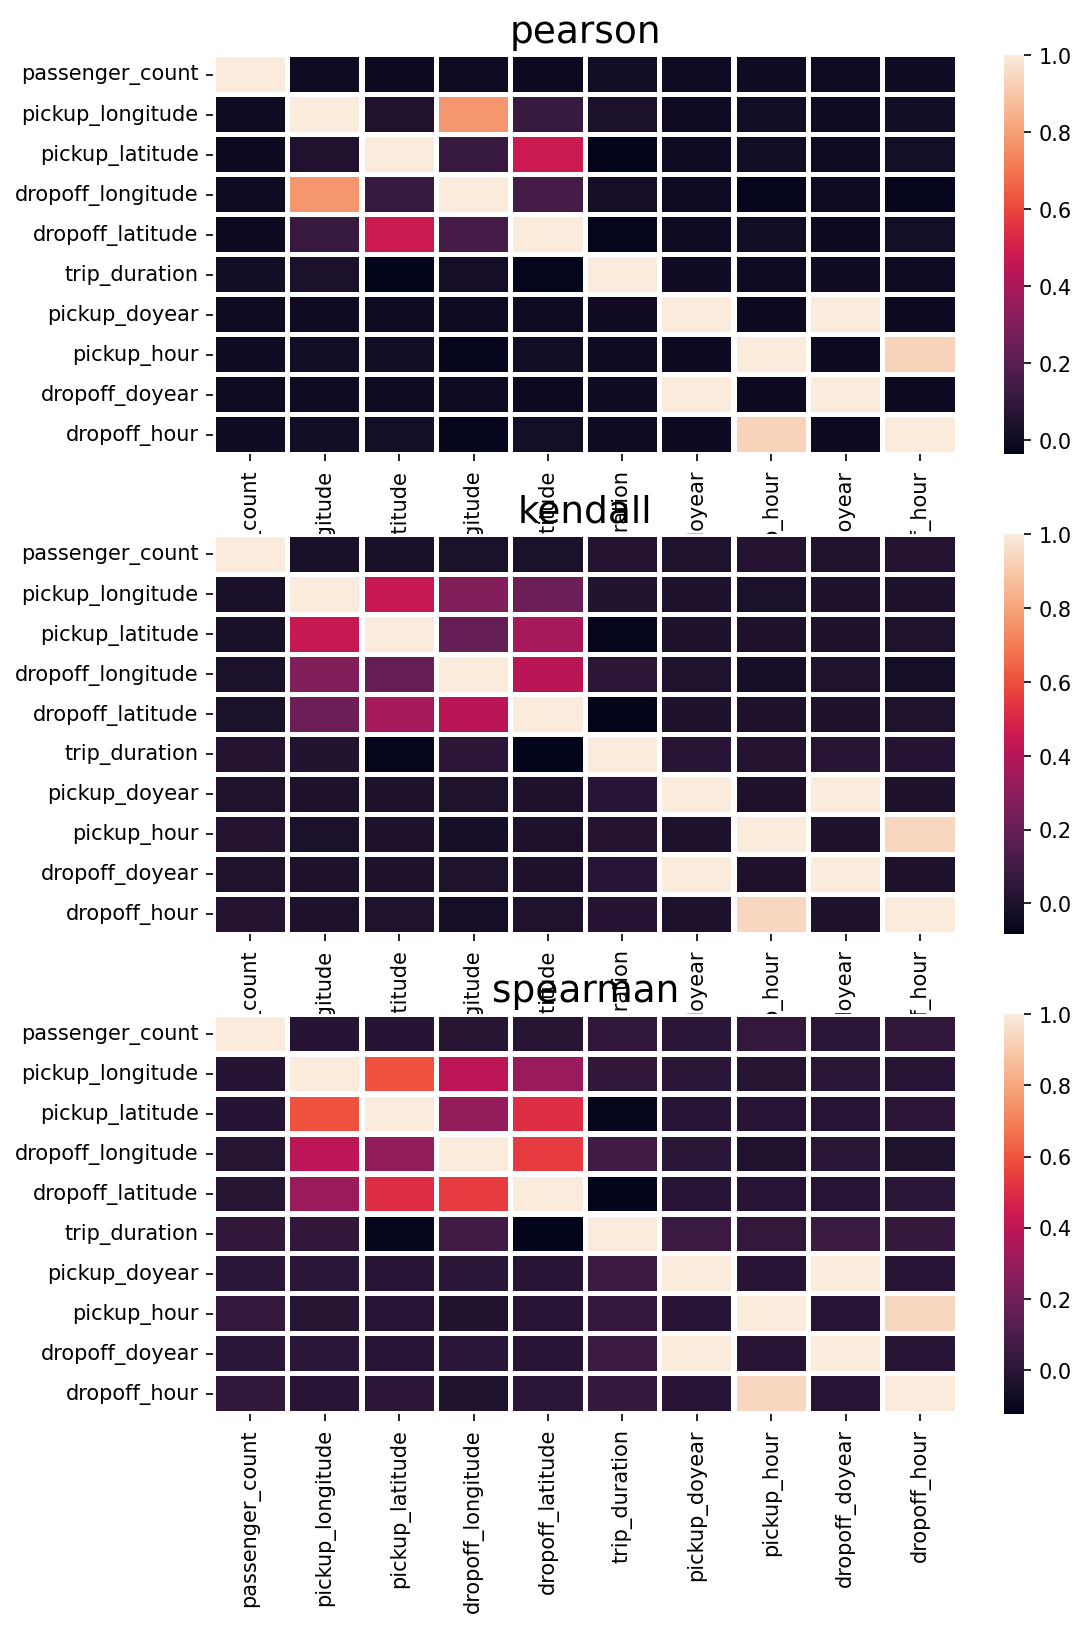

In [ ]:
plt.figure(figsize = (8,12), dpi=150)
for j,i in enumerate(['pearson', 'kendall', 'spearman']):
  plt.subplot(3, 1, j+1)
  correlation = numericals.dropna().corr(method = i)
  sns.heatmap(correlation, linewidths=2)
  plt.title(i, fontsize=18)



*  Pearson, kendall and spearman show the same patterns, differing slightly in magnitudes
*  [pickup longitude and latitude], [dropoff longitude and latitude] have strong correlation within themselves.
*  pickup long/lat and dropoff long/lat have weaker correlation with each other
*  pickup day of year and dropoff day of year have very strong correlation. same with pickup hour and dropoff hour
*   Passenger count and trip duration have no correlation with any of the other variables.








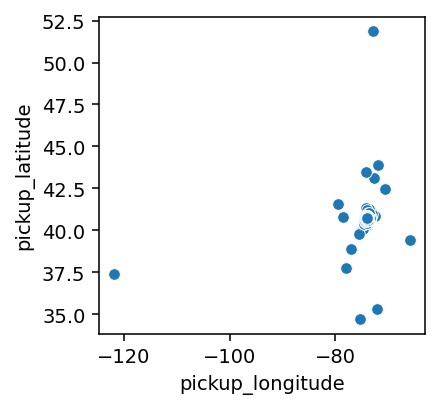

In [ ]:
# scatterplot
plt.figure(figsize=(3,3), dpi=140)
sns.scatterplot(numericals['pickup_longitude'], numericals['pickup_latitude'])

Relation not clear due to outliers

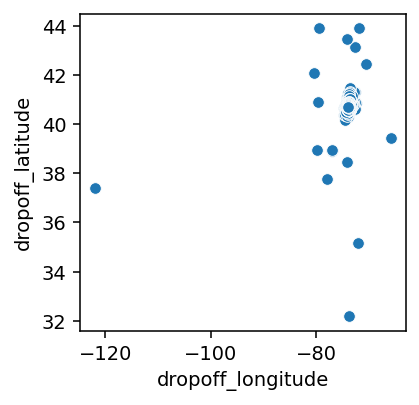

In [ ]:
plt.figure(figsize=(3,3), dpi=140)
sns.scatterplot(numericals['dropoff_longitude'], numericals['dropoff_latitude'])

Relation not clear due to presence of outliers

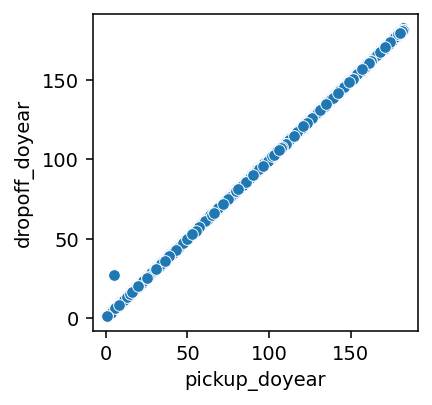

In [ ]:
plt.figure(figsize=(3,3), dpi=140)
sns.scatterplot(numericals['pickup_doyear'], numericals['dropoff_doyear'])

Validates the very strong correlation between pickup and dropoff day of year.

Can be used for feature engineering later.

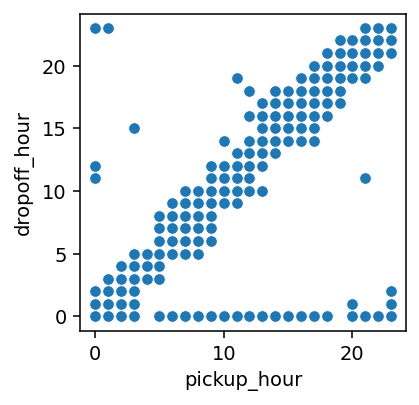

In [ ]:
plt.figure(figsize=(3,3), dpi=140)
sns.scatterplot(numericals['pickup_hour'], numericals['dropoff_hour'])

Validates the very strong correlation between pickup and dropoff hour.

Can be used for feature engineering later.

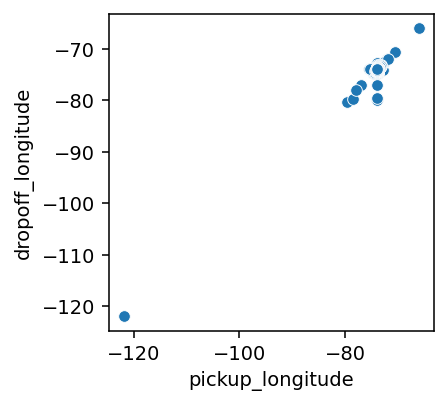

In [ ]:
plt.figure(figsize=(3,3), dpi=140)
sns.scatterplot(numericals['pickup_longitude'], numericals['dropoff_longitude'])

Validates a positive correlation between pickup and dropoff longitudes

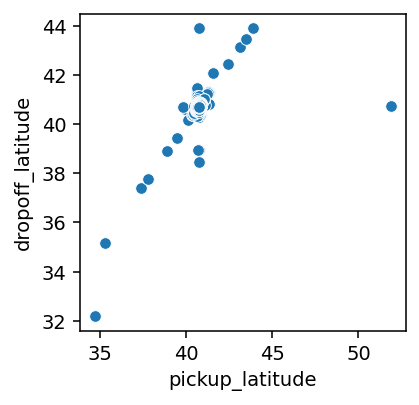

In [ ]:
plt.figure(figsize=(3,3), dpi=140)
sns.scatterplot(numericals['pickup_latitude'], numericals['dropoff_latitude'])

Validates a positive correlation between pickup and dropoff latitudes.

In [ ]:
numericals2 = numericals['trip_duration'][taxi['trip_duration'] < 15000]/3600  # to remove outliers and convert into hours.

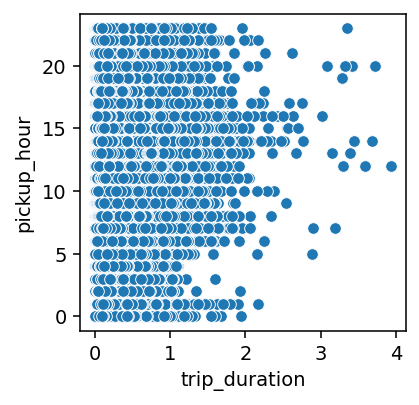

In [ ]:
plt.figure(figsize=(3,3), dpi=140)
sns.scatterplot(numericals2, numericals['pickup_hour'])

Proves that there is no clear correlation between Trip duration and Pickup time.

### Conclusion from Numerical Bivariate analysis:

*   The hypothesis that Trip duration is affected by time of pickup could not be validated





> ##  Numerical-Categorical






Hypothesis to be tested:

1.  Does occurence of a Holiday affect trip duration?
2.  Does being a weekday or a weekend affect trip duration?





In [ ]:
def z_test(X1, X2, sigma1, sigma2, N1, N2):
  from numpy import sqrt, abs, round
  from scipy.stats import norm

  denom = sqrt(sigma1**2/N1 + sigma2**2/N2)
  numer = X1 - X2
  z = numer/denom
  p = 2*(1 - norm.cdf(abs(z)))
  return p

In [ ]:
def t_test(X1, X2, sdev1, sdev2, n1, n2):
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist

  denom = sqrt(sdev1**2/n1 + sdev2**2/n2)
  numer = X1 - X2
  t = numer/denom
  df = n1 + n2 - 2
  p = 2*(1 - t_dist.cdf(abs(t), df))
  return p

In [ ]:
def BVA_numcat(data, num, cat):
 # creating samples
  S1 = data[num][data[cat]==5][:] # saturdays
  S2 = data[num][data[cat]==2][:] # wednesdays

 # performing statistical tests:
  n1, n2 = len(S1), len(S2)
  m1, m2 = S1.mean(), S2.mean()
  std1, std2 = S1.std(), S2.std()

  z_p_value = z_test(m1, m2, std1, std2, n1, n2)

  t_p_value = t_test(m1, m2, std1, std2, n1, n2)

  print("P value from Z test: ", z_p_value)
  print("P value from T test: ", t_p_value)





Null Hypothesis: "The average trip duration of Weekend rides is not significantly less than that of Weekday rides."

Alternate Hypothesis: "The average trip duration of Weekend rides is significantly less than that of Weekday rides."

In [ ]:

table = pd.pivot_table(data = taxi, values = 'trip_duration', columns = 'pickup_day', aggfunc = np.mean)
table


pickup_day,0,1,2,3,4,5,6
trip_duration,893.184555,980.550279,975.899557,1005.446929,990.022999,913.986114,894.571088


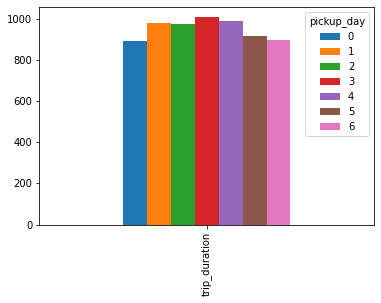

In [ ]:
table.plot(kind='bar')

In [ ]:
BVA_numcat(taxi, 'trip_duration', 'pickup_day')

P value from Z test:  5.179757154083475e-06
P value from T test:  5.182597522246368e-06


### Inferences from statistical tests:
As p-value is much less than Alpha = 0.05, the Null hypothesis can be rejected

Therefore the rides on weekends are generally ***shorter*** than those on weekdays.

Clearly the trip duration is smaller on weekends, as compared to any weekday except Monday, as validated by the graph.

An Average ride takes the longest duration on Thursday, which also has the highest no of rides in a day.

In [ ]:
tablo = pd.pivot_table(data = taxi, values = 'trip_duration', columns = 'pickup_month', aggfunc = np.mean)
tablo

pickup_month,1,2,3,4,5,6
trip_duration,924.76953,887.498995,933.949336,967.318481,996.001055,1002.321917


Interesting observation, that February has much lower trip duration than other months, a difference of greater than 1 min.

Also the trip duration exhibits a steady increase with the months.

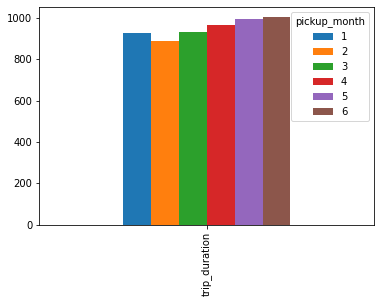

In [ ]:
tablo.plot(kind='bar')

### Conclusion

Thus the Hypothesis that Trip-duration is supposed to be smaller on weekends can be safely accepted.

# EDA Final Conclusion:

With the data available only the following Hypothesis were validated:

*   Trip Duration is smaller on weekends as compared to weekdays due to less congestion.


Hypothesis which could not be accepted (either due to Lack of appropriate data or due to lack of sufficient Evidence):


*  Trip duration would be longer in rush hours, i.e. should depend on time of
pickup.

*  Trip duration would be longer for rides covering longer distances.

*  Trip duration would be smaller on Holidays
*  Trip duration would depend on Traffic conditions.

*  Trip duration would depend on weather condtions.
*  Trip duration would depend on age or sex of driver. etc.







